In [6]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpl
import os

In [7]:
api_key = os.environ.get("api_key")
api_secret = os.environ.get("api_secret")

In [8]:
client = Client(api_key, api_secret)

In [9]:
tickers = client.get_all_tickers()

In [10]:
tickers

[{'symbol': 'ETHBTC', 'price': '0.06557200'},
 {'symbol': 'LTCBTC', 'price': '0.00331700'},
 {'symbol': 'BNBBTC', 'price': '0.00796800'},
 {'symbol': 'NEOBTC', 'price': '0.00085500'},
 {'symbol': 'QTUMETH', 'price': '0.00377600'},
 {'symbol': 'EOSETH', 'price': '0.00135800'},
 {'symbol': 'SNTETH', 'price': '0.00002519'},
 {'symbol': 'BNTETH', 'price': '0.00111200'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00016870'},
 {'symbol': 'BNBETH', 'price': '0.12150000'},
 {'symbol': 'BTCUSDT', 'price': '54718.15000000'},
 {'symbol': 'ETHUSDT', 'price': '3589.08000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001741'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [11]:
tickers[1]['price']


'0.00331700'

In [12]:
ticker_df = pd.DataFrame(tickers)

In [13]:
ticker_df.head()

,symbol,price
0,ETHBTC,0.06557200
1,LTCBTC,0.00331700
2,BNBBTC,0.00796800
3,NEOBTC,0.00085500
4,QTUMETH,0.00377600


In [14]:
ticker_df.tail()

,symbol,price
1674,CVPUSDT,2.31800000
1675,AGLDBTC,0.00008047
1676,AGLDBNB,0.01009900
1677,AGLDBUSD,4.40500000
1678,AGLDUSDT,4.40300000


In [15]:
ticker_df.set_index('symbol', inplace=True)

In [19]:
float(ticker_df.loc['ETHUSDC']['price'])
float(ticker_df.loc['BTCUSDT']['price'])

54718.15

In [20]:
# Get Depth
depth = client.get_order_book(symbol='BTCUSDT')

In [21]:
depth

{'lastUpdateId': 14136086157,
 'bids': [['54657.28000000', '0.03911000'],
  ['54655.66000000', '0.00064000'],
  ['54646.29000000', '0.04574000'],
  ['54645.81000000', '0.03055000'],
  ['54643.22000000', '0.10620000'],
  ['54643.18000000', '0.09147000'],
  ['54640.77000000', '0.02200000'],
  ['54636.00000000', '0.00169000'],
  ['54634.02000000', '0.13720000'],
  ['54632.77000000', '0.02000000'],
  ['54618.72000000', '0.07990000'],
  ['54618.71000000', '0.01468000'],
  ['54618.30000000', '0.21338000'],
  ['54616.82000000', '0.16010000'],
  ['54616.81000000', '0.45725000'],
  ['54612.97000000', '0.15000000'],
  ['54612.14000000', '0.00036000'],
  ['54612.13000000', '0.07213000'],
  ['54609.09000000', '0.06669000'],
  ['54606.63000000', '0.00296000'],
  ['54604.15000000', '0.32548000'],
  ['54604.14000000', '0.91450000'],
  ['54603.97000000', '0.01534000'],
  ['54595.00000000', '0.22000000'],
  ['54593.37000000', '0.23776000'],
  ['54593.35000000', '0.05436000'],
  ['54592.08000000', '0.01

In [22]:
depth_df = pd.DataFrame(depth['asks'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,54657.29000000,1.90439000
1,54657.80000000,0.08337000
2,54658.70000000,0.16100000
3,54658.72000000,0.04574000
4,54658.83000000,0.07199000


In [23]:
depth_df.dtypes

Price     object
Volume    object
dtype: object

In [24]:
client.get_historical_klines()

<bound method Client.get_historical_klines of <binance.client.Client object at 0x7fb2e396e490>>

In [35]:
# BTC Minute Data from past day
historical_df = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1MINUTE, '1 day ago UTC')

In [36]:
hist_df = pd.DataFrame(historical_df)

In [37]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1633460820000,50686.57000000,50732.93000000,50678.83000000,50710.50000000,1.22069000,1633460879999,61913.76842690,24,0.54629000,27711.95959340,0
1,1633460880000,50689.09000000,50725.80000000,50678.71000000,50703.37000000,1.39706000,1633460939999,70829.97529910,53,1.13984000,57790.86363560,0
2,1633460940000,50698.33000000,50698.33000000,50618.42000000,50643.17000000,0.88397000,1633460999999,44774.80551350,40,0.06711000,3399.87306390,0
3,1633461000000,50665.26000000,50693.88000000,50629.45000000,50665.25000000,0.90774000,1633461059999,45999.99092450,41,0.28245000,14316.60178560,0
4,1633461060000,50640.09000000,50674.66000000,50618.21000000,50674.66000000,0.91386000,1633461119999,46297.79918090,36,0.78150000,39595.35193390,0


In [43]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [39]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1435,1633546920000,54771.73000000,54775.04000000,54709.03000000,54728.73000000,0.35861000,1633546979999,19634.46516500,18,0.07651000,4189.03445020,0
1436,1633546980000,54744.51000000,54801.06000000,54721.98000000,54801.06000000,0.84690000,1633547039999,46384.06110940,19,0.84272000,46155.21064040,0
1437,1633547040000,54778.33000000,54796.75000000,54760.77000000,54764.85000000,0.41787000,1633547099999,22892.66162140,19,0.38105000,20876.01887990,0
1438,1633547100000,54788.07000000,54840.52000000,54775.68000000,54817.98000000,0.63375000,1633547159999,34740.39298450,17,0.06936000,3801.49155590,0
1439,1633547160000,54806.11000000,54806.11000000,54780.81000000,54780.81000000,0.04751000,1633547219999,2602.80455240,5,0.04448000,2436.76609730,0


In [40]:
hist_df.shape

(1440, 12)

In [44]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [45]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [46]:
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [47]:
hist_df[numeric_columns] = hist_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [48]:
hist_df.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1435,2021-10-06 19:02:00,54771.73,54775.04,54709.03,54728.73,0.35861,2021-10-06 19:02:59.999000064,19634.465165,18,0.07651,4189.034450,0
1436,2021-10-06 19:03:00,54744.51,54801.06,54721.98,54801.06,0.84690,2021-10-06 19:03:59.999000064,46384.061109,19,0.84272,46155.210640,0
1437,2021-10-06 19:04:00,54778.33,54796.75,54760.77,54764.85,0.41787,2021-10-06 19:04:59.999000064,22892.661621,19,0.38105,20876.018880,0
1438,2021-10-06 19:05:00,54788.07,54840.52,54775.68,54817.98,0.63375,2021-10-06 19:05:59.999000064,34740.392985,17,0.06936,3801.491556,0
1439,2021-10-06 19:06:00,54806.11,54806.11,54780.81,54780.81,0.04751,2021-10-06 19:06:59.999000064,2602.804552,5,0.04448,2436.766097,0


In [49]:
hist_df.dtypes


Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [50]:
hist_df.describe()


,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03,1440.000000,1440.000000,1.440000e+03
mean,52163.974431,52200.486958,52131.239472,52166.635333,1.542984,8.118851e+04,45.259722,0.760847,4.003099e+04
std,1428.634652,1437.749658,1421.159989,1429.739793,2.793975,1.479197e+05,67.849744,1.577978,8.354275e+04
min,50459.410000,50501.940000,50408.960000,50471.520000,0.001110,5.721361e+01,2.000000,0.000000,0.000000e+00
25%,51315.282500,51339.162500,51287.530000,51312.955000,0.223557,1.157004e+04,15.000000,0.079175,4.112859e+03
50%,51478.160000,51503.635000,51456.590000,51480.045000,0.629510,3.302493e+04,27.000000,0.252225,1.305732e+04
75%,52831.102500,52875.622500,52764.497500,52842.427500,1.619333,8.526941e+04,50.000000,0.798083,4.197961e+04
max,55333.740000,55509.820000,55060.460000,55466.760000,33.434860,1.739957e+06,952.000000,23.186611,1.239934e+06


In [51]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1440 non-null   datetime64[ns]
 1   Open                1440 non-null   float64       
 2   High                1440 non-null   float64       
 3   Low                 1440 non-null   float64       
 4   Close               1440 non-null   float64       
 5   Volume              1440 non-null   float64       
 6   Close Time          1440 non-null   datetime64[ns]
 7   Quote Asset Volume  1440 non-null   float64       
 8   Number of Trades    1440 non-null   int64         
 9   TB Base Volume      1440 non-null   float64       
 10  TB Quote Volume     1440 non-null   float64       
 11  Ignore              1440 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 135.1+ KB


In [52]:
# Technical Analysis
import mplfinance as mpf

In [54]:
hist_df.set_index('Close Time').tail(100)

,Open Time,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
Close Time,,,,,,,,,,,
2021-10-06 17:27:59.999000064,2021-10-06 17:27:00,54576.67,54633.90,54557.73,54616.33,0.53936,29442.370051,31,0.44677,24387.214242,0
2021-10-06 17:28:59.999000064,2021-10-06 17:28:00,54600.00,54628.85,54600.00,54603.80,0.66459,36290.676380,21,0.59225,32339.572147,0
2021-10-06 17:29:59.999000064,2021-10-06 17:29:00,54609.87,54609.87,54553.44,54566.52,0.17676,9646.576980,20,0.08763,4781.812464,0
2021-10-06 17:30:59.999000064,2021-10-06 17:30:00,54591.05,54633.31,54581.44,54632.92,1.47967,80816.092463,34,1.28062,69942.697182,0
2021-10-06 17:31:59.999000064,2021-10-06 17:31:00,54632.92,54685.32,54614.91,54673.38,2.27495,124294.707070,45,1.41866,77508.194145,0
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-06 19:02:59.999000064,2021-10-06 19:02:00,54771.73,54775.04,54709.03,54728.73,0.35861,19634.465165,18,0.07651,4189.034450,0
2021-10-06 19:03:59.999000064,2021-10-06 19:03:00,54744.51,54801.06,54721.98,54801.06,0.84690,46384.061109,19,0.84272,46155.210640,0
2021-10-06 19:04:59.999000064,2021-10-06 19:04:00,54778.33,54796.75,54760.77,54764.85,0.41787,22892.661621,19,0.38105,20876.018880,0


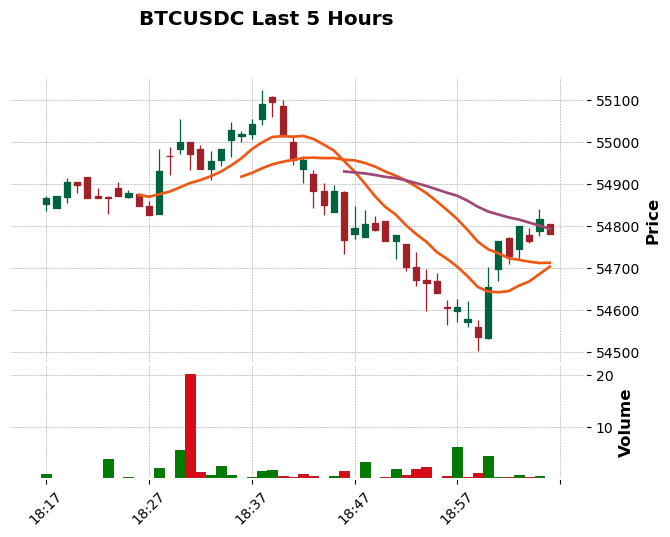

In [82]:
mpf.plot(hist_df.set_index('Close Time').tail(50), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDC Last 5 Hours', 
        mav=(10,20,30))

In [71]:
# Daily Data from 2021 
btc_daily_data = client.get_historical_klines('BTCUSDC', Client.KLINE_INTERVAL_1DAY, '1 Jan 2021')

In [72]:
btc_daily_df = pd.DataFrame(btc_daily_data)

In [73]:
btc_daily_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']

In [74]:
btc_daily_df['Open Time'] = pd.to_datetime(btc_daily_df['Open Time']/1000, unit='s')
btc_daily_df['Close Time'] = pd.to_datetime(btc_daily_df['Close Time']/1000, unit='s')

In [75]:
numeric_columns_d = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [76]:
btc_daily_df[numeric_columns] = btc_daily_df[numeric_columns].apply(pd.to_numeric, axis=1)

In [77]:
btc_daily_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,279.000000,279.000000,279.000000,279.000000,279.000000,2.790000e+02,279.000000,279.000000,2.790000e+02
mean,44581.577025,46130.025412,42849.600000,44673.805699,2765.048595,1.185185e+08,57341.175627,1354.413585,5.805823e+07
std,9037.352370,9125.786119,8968.644896,9010.103550,1525.765956,5.816926e+07,24227.026791,763.823137,2.938148e+07
min,28964.540000,29680.000000,28000.000000,29407.930000,709.605070,3.442800e+07,19629.000000,329.246880,1.588396e+07
25%,35922.920000,37885.155000,34346.710000,35951.350000,1842.166604,8.401805e+07,43509.000000,881.695201,4.016232e+07
50%,44952.900000,46787.680000,43741.910000,45174.460000,2384.181723,1.081952e+08,51983.000000,1173.446457,5.207091e+07
75%,51406.855000,52871.210000,49049.150000,51540.635000,3249.800991,1.380733e+08,66842.500000,1597.393446,6.849540e+07
max,63583.850000,64882.470000,62032.950000,63554.560000,13553.429477,5.128652e+08,226279.000000,6347.727851,2.410801e+08


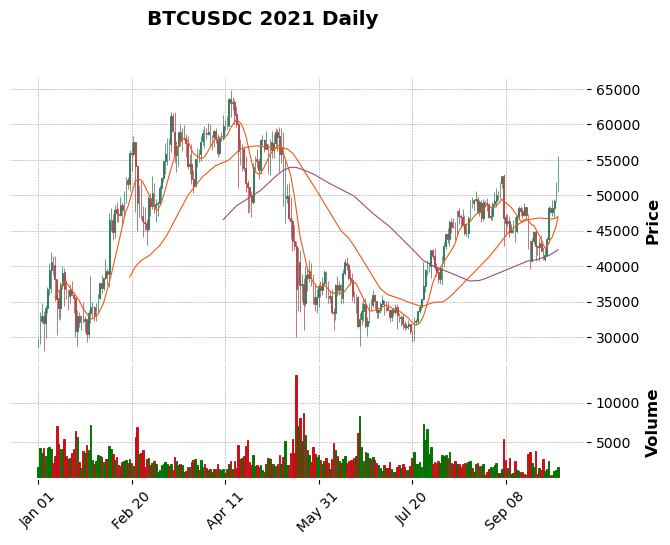

In [81]:
mpf.plot(btc_daily_df.set_index('Close Time').tail(284), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDC 2021 Daily ', 
        mav=(10,50,100))

In [83]:
# Save to csv files
btc_daily_df.columns

Index(['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time',
       'Quote Asset Volume', 'Number of Trades', 'TB Base Volume',
       'TB Quote Volume', 'Ignore'],
      dtype='object')

In [86]:
# Just get the OHLCV not the quote asset, # of trades etc....
ohlcv_daily = btc_daily_df.iloc[:,0:7]
ohlcv_minute = hist_df.iloc[:,0:7]

In [88]:
ohlcv_daily

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2021-01-01,28964.54,29680.00,28608.73,29407.93,1736.620480,2021-01-01 23:59:59.999000064
1,2021-01-02,29393.99,33500.00,29027.03,32215.18,4227.234681,2021-01-02 23:59:59.999000064
2,2021-01-03,32216.13,34851.30,32002.65,33033.26,3523.881120,2021-01-03 23:59:59.999000064
3,2021-01-04,33040.00,33648.27,28000.00,32017.58,4218.572357,2021-01-04 23:59:59.999000064
4,2021-01-05,32027.11,34498.00,29882.30,34059.70,3150.244271,2021-01-05 23:59:59.999000064
...,...,...,...,...,...,...,...
274,2021-10-02,48181.13,48349.39,47460.89,47672.68,719.579480,2021-10-02 23:59:59.999000064
275,2021-10-03,47662.03,49399.99,47134.57,48220.00,756.677670,2021-10-03 23:59:59.999000064
276,2021-10-04,48214.74,49507.80,46933.60,49247.63,1283.577550,2021-10-04 23:59:59.999000064
277,2021-10-05,49252.59,51921.46,49057.36,51488.94,1382.533040,2021-10-05 23:59:59.999000064


In [89]:
ohlcv_minute

,Open Time,Open,High,Low,Close,Volume,Close Time
0,2021-10-05 19:07:00,50686.57,50732.93,50678.83,50710.50,1.22069,2021-10-05 19:07:59.999000064
1,2021-10-05 19:08:00,50689.09,50725.80,50678.71,50703.37,1.39706,2021-10-05 19:08:59.999000064
2,2021-10-05 19:09:00,50698.33,50698.33,50618.42,50643.17,0.88397,2021-10-05 19:09:59.999000064
3,2021-10-05 19:10:00,50665.26,50693.88,50629.45,50665.25,0.90774,2021-10-05 19:10:59.999000064
4,2021-10-05 19:11:00,50640.09,50674.66,50618.21,50674.66,0.91386,2021-10-05 19:11:59.999000064
...,...,...,...,...,...,...,...
1435,2021-10-06 19:02:00,54771.73,54775.04,54709.03,54728.73,0.35861,2021-10-06 19:02:59.999000064
1436,2021-10-06 19:03:00,54744.51,54801.06,54721.98,54801.06,0.84690,2021-10-06 19:03:59.999000064
1437,2021-10-06 19:04:00,54778.33,54796.75,54760.77,54764.85,0.41787,2021-10-06 19:04:59.999000064
1438,2021-10-06 19:05:00,54788.07,54840.52,54775.68,54817.98,0.63375,2021-10-06 19:05:59.999000064


In [99]:
# Save bitcoin data to CSVs

In [95]:
ohlcv_daily.to_csv('daily_btc_ohclv_2021', index=False)

In [98]:
ohlcv_minute.to_csv('minute_btc_ohclv_5th_6th', index=False)